In [0]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn



In [0]:
seaborn.__version__


'0.9.0'

In [0]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  Direccion = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  Direccion = ".."
if 'ftfy' not in sys.modules:
    !pip install ftfy

     |████████████████████████████████| 51kB 2.0MB/s 


In [0]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format 

In [0]:
datapasos = pandas.read_json(Direccion + "/input/pasos.json")

In [0]:
datapasos.shape


(252, 3)

In [0]:
datapasos.describe

<bound method NDFrame.describe of                                location  ...                                           province
0             [-54.832543, -68.3712885]  ...                                   Tierra del Fuego
1            [-54.8249379, -68.3258626]  ...                                   Tierra del Fuego
2            [-54.8096728, -68.3114748]  ...                                   Tierra del Fuego
3            [-54.8019121, -68.3029511]  ...                                   Tierra del Fuego
4            [-51.6896359, -72.2993574]  ...                                         Santa Cruz
5            [-51.5866042, -72.3649779]  ...                                         Santa Cruz
6            [-51.2544488, -72.2652242]  ...                                         Santa Cruz
7            [-53.3229179, -68.6063227]  ...                                   Tierra del Fuego
8              [-53.78438, -67.7173342]  ...                                   Tierra del Fuego
9     

In [0]:
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

Realizamos el histograma

In [0]:
datapasos[datapasos.name.duplicated(keep=False)]


,location,name,province
14,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,Santa Cruz
15,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...
22,"[-46.2752267, -71.7270022]",ING. PALLAVICINI - IBAÑEZ,Santa Cruz
23,"[-46.2752267, -71.7270022]",ING. PALLAVICINI - IBAÑEZ,Santa Cruz
30,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut
31,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut
53,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen
54,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen
63,"[-37.9341161, -57.5745361]",AERO MAR DEL PLATA,Buenos Aires
66,"[-32.825277, -70.0729456]",CRISTO REDENTOR (LIBERTADORES),Mendoza


In [0]:
coord = datapasos['location'].apply(pandas.Series) 
coord = coord.rename(columns = lambda x : 'coord_' + str(x))
datapasos = pandas.concat([datapasos[:], coord[:]], axis=1)
datapasos[coord.duplicated(keep=False)]

,location,name,province,coord_0,coord_1
14,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,Santa Cruz,-51.61,-69.31
15,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...,-51.61,-69.31
22,"[-46.2752267, -71.7270022]",ING. PALLAVICINI - IBAÑEZ,Santa Cruz,-46.28,-71.73
23,"[-46.2752267, -71.7270022]",ING. PALLAVICINI - IBAÑEZ,Santa Cruz,-46.28,-71.73
30,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut,-45.79,-67.47
31,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut,-45.79,-67.47
32,"[-45.7894354, -67.4696871]",AEROPUERTO INTERNACIONAL GENERAL ENRIQUE MOSCONI,Chubut,-45.79,-67.47
38,"[-41.1467101, -71.1642129]",AEROPUERTO INTERNACIONAL TENIENTE LUIS CANDELA...,Rio Negro,-41.15,-71.16
45,"[-40.1133859, -71.6806031]",PASO HUA - HUM,Neuquen,-40.11,-71.68
53,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen,-38.95,-68.14


In [0]:
datapasos.province.describe()

count              252
unique              25
top       Buenos Aires
freq                48
Name: province, dtype: object

In [0]:
list(datapasos.province.unique())

['Tierra del Fuego',
 'Santa Cruz',
 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
 'Chubut',
 'Rio Negro',
 'Neuquen',
 'NEUQUEN',
 'Buenos Aires',
 'Mendoza',
 'San Luis',
 'San Juan',
 'Santa Fe',
 'Córdoba',
 'Cordoba',
 'Entre Rios',
 'La Rioja',
 'Corrientes',
 'Catamarca',
 'Santiago del Estero',
 'Tucuman',
 'Chaco',
 'Misiones',
 'Formosa',
 'Salta',
 'Jujuy']

In [0]:
datapasos2 = datapasos[datapasos.province != 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ']

datapasos2 = datapasos2.replace({'NEUQUEN': 'Neuquen', 'Córdoba': 'Cordoba'})
datapasos2.province.describe()

count              251
unique              22
top       Buenos Aires
freq                48
Name: province, dtype: object

In [0]:
datapasos2.groupby('province')['name','location'].nunique()

,name,location
province,,
Buenos Aires,45,42
Catamarca,3,3
Chaco,3,3
Chubut,14,13
Cordoba,3,3
Corrientes,15,15
Entre Rios,12,12
Formosa,11,9
Jujuy,8,8


Text(0, 0.5, 'Cantidad de provincias')

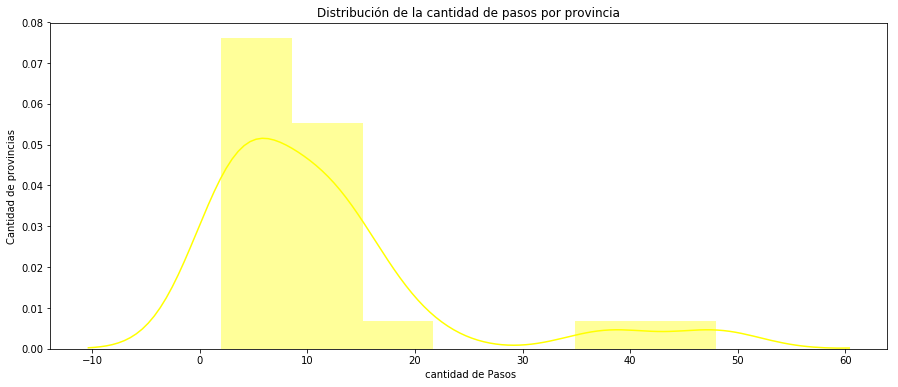

In [0]:
plt.figure(figsize=(15,6))
_ = sns.distplot(datapasos2.province.value_counts(), color='YELLOW')
_ = plt.title('Distribución de la cantidad de pasos por provincia')
plt.xlabel(" cantidad de Pasos")
plt.ylabel("Cantidad de provincias")

El número mas frecuente de pasos por provincia se encuentra en torno a 10 pasos

Ahora paa realizar un gráfico que indique la distribución de frecuencias de pasos por provincia, onstruimos un diagrama de barras.


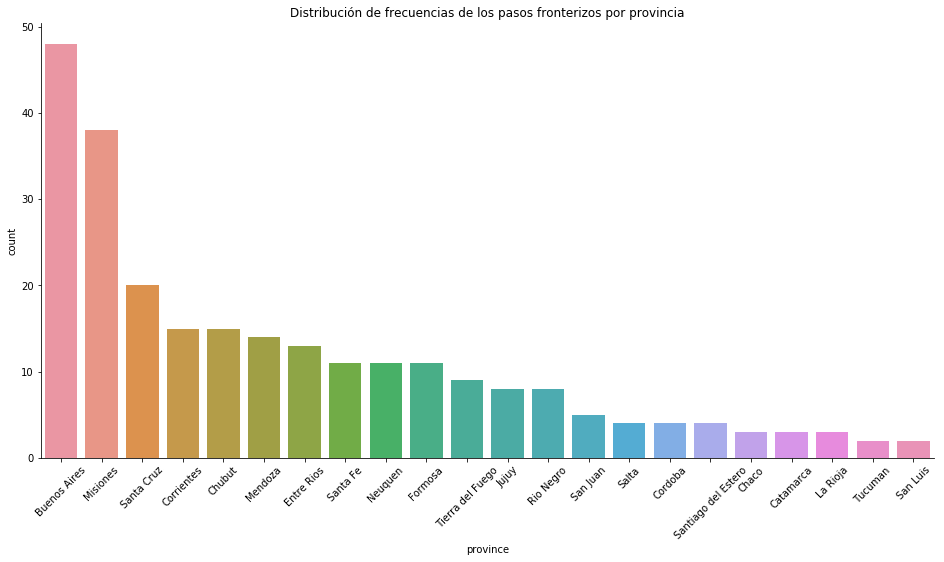

In [0]:
plt.figure(figsize=(16,8))

seaborn.countplot(x='province', data=datapasos2, order = datapasos2['province'].value_counts().index)
plt.title("Distribución de frecuencias de los pasos fronterizos por provincia")
plt.xticks(rotation=45)
seaborn.despine()

# **PRACTICO 3: LIMPIEZA DE DATOS**

In [0]:


kickstarter_2018 = pd.read_csv(Direccion + "/input/kickstarter-projects/ks-projects-201801.csv")

In [0]:
kickstarter_2018

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.00,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.00,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.00,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.00,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.00,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [0]:
kickstarter_2018.shape

(378661, 15)

In [0]:
prj_duplicados_x_nombre = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)]
prj_duplicados_x_nombre.sort_values('name')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.00,2013-12-19 21:51:50,0.00,canceled,0,US,0.00,0.00,6500.00
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.00,2014-01-03 20:39:16,37.00,failed,3,US,37.00,37.00,6500.00
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.00,2011-08-28 21:27:52,3000.00,successful,24,US,3000.00,3000.00,3000.00
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.00,2013-01-26 03:51:47,1417.00,failed,26,US,1417.00,1417.00,5000.00
173036,1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.00,2015-06-27 02:02:00,100.00,failed,1,US,100.00,100.00,100000.00
265864,422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.00,2017-04-14 00:08:52,1.00,failed,1,US,25.00,1.00,100000.00
352573,866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.00,2015-01-27 19:30:43,7248.00,canceled,9,US,7248.00,7248.00,20000.00
149726,1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.00,2014-07-29 13:12:21,11260.00,canceled,7,US,11260.00,11260.00,15000.00
196363,1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.00,2016-05-07 01:56:36,0.00,canceled,0,"N,0""",nan,0.00,5000.00
353421,870322805,"""Color"" Music Video",Music,Music,USD,2015-09-16,1100.00,2015-09-02 00:03:02,1100.00,undefined,0,"N,0""",nan,1100.00,1100.00


En funcion de lo verificado se han replicado 5125 registros en total. Algunos duplicados, triplicados, otros cuadriculados, etc.

In [0]:
import chardet

In [0]:
import string

string.ascii_letters + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

# **Ejercicio 2:**
Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado.
1. Generamos el hash

In [0]:
from hashlib import md5

def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()


kickstarter_2018['hash_name'] = kickstarter_2018['name'].apply(hashit)

2. A continuacion se presenta la lista de names con sus respectivos hash

In [0]:
kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)].sort_values(by='name')[['name','hash_name','category','main_category','currency','deadline']]

,name,hash_name,category,main_category,currency,deadline
342920,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1,Fashion,Fashion,USD,2014-02-09
342692,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1,Fashion,Fashion,USD,2014-03-01
2024,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e,Shorts,Film & Video,USD,2011-09-25
322671,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e,Documentary,Film & Video,USD,2013-03-27
173036,"""American Sports Stories"" - An Athletic Quest",19a82bc4c5961834282575d07d9b5f7c,Shorts,Film & Video,USD,2015-08-26
265864,"""American Sports Stories"" - An Athletic Quest",19a82bc4c5961834282575d07d9b5f7c,Television,Film & Video,USD,2017-05-14
352573,"""City of Mercy"" (Canceled)",b4ca2044f21f67e13ddb7583f59189a7,Film & Video,Film & Video,USD,2015-02-26
149726,"""City of Mercy"" (Canceled)",b4ca2044f21f67e13ddb7583f59189a7,Television,Film & Video,USD,2014-08-28
196363,"""Color"" Music Video",bed6c6cbc0540c8d40b7e2311806cc5c,Film & Video,Film & Video,USD,2016-06-06
353421,"""Color"" Music Video",bed6c6cbc0540c8d40b7e2311806cc5c,Music,Music,USD,2015-09-16


Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [0]:
import ftfy.badness as bad
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)
  
  


In [0]:
kickstarter_2018['name_raro'] = kickstarter_2018['name'].apply(weird)
cant_raros = kickstarter_2018[kickstarter_2018['name_raro'] > 1].shape[0]
print ('El número total de nombres raros en kickstarter_2018 es ', cant_raros)

El número total de nombres raros en kickstarter_2018 es  26


In [0]:
kickstarter_2018_version2 = pd.read_csv(Direccion + "/input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')
kickstarter_2018_version2['name_raro'] = kickstarter_2018_version2['name'].apply(weird)
kickstarter_2018_version2[kickstarter_2018_version2['name_raro'] > 1].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_raro
63,1000235643,HIIT Bottleâ¢,Drinks,Food,USD,2015-04-27,15000.00,2015-03-13 18:33:08,124998.00,successful,2784,US,124998.00,124998.00,15000.00,2
70,1000260691,Gizbeeâ¢ Unlimited Removable Storage for Your...,Gadgets,Technology,USD,2016-03-25,87000.00,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00,2
123,1000519001,Wordwright: reÂ·deÂ·finÂ·ing word play,Tabletop Games,Games,USD,2015-12-29,2000.00,2015-11-21 14:12:27,14794.00,successful,624,US,14794.00,14794.00,2000.00,6
157,1000644119,OperaciÃ³n Douve,Action,Film & Video,EUR,2016-05-01,100.00,2016-03-02 19:09:05,20.00,failed,2,ES,21.77,22.85,114.27,2
184,1000767040,Strait Jacket â Tangle Prevention For Headph...,Product Design,Design,USD,2016-11-23,30000.00,2016-10-24 03:35:51,1041.00,canceled,46,US,549.00,1041.00,30000.00,4


In [0]:
cant_raros_version2 = kickstarter_2018_version2[kickstarter_2018_version2['name_raro'] > 1].shape[0]
print ('El número total de nombres raros en kickstarter_2018 es ', cant_raros)
print ('El número total de nombres raros con encoding iso-8859-1, al cual llamamos version2 es ', cant_raros_version2)

El número total de nombres raros en kickstarter_2018 es  26
El número total de nombres raros con encoding iso-8859-1, al cual llamamos version2 es  7682



Ejercicio 4

Codificar currency con ambas estrategias


In [0]:
column='currency'
kickstarter_2018[column].unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

In [0]:
import sklearn
from sklearn import preprocessing

In [0]:
print(le.classes_)

['AUD' 'CAD' 'CHF' 'DKK' 'EUR' 'GBP' 'HKD' 'JPY' 'MXN' 'NOK' 'NZD' 'SEK'
 'SGD' 'USD']


In [0]:
column='currency'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [0]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [0]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hash_name,name_raro
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad,0


In [0]:
# Proceso reverso a como estaba prevamente categorizada la variable
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hash_name,name_raro
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad,0


Ahora realizamos la nueva codificación, pero usando la estrategia label binarizer

In [0]:
from sklearn.preprocessing import LabelBinarizer
other_column = 'currency'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Ejercicio 5**

    5.1.¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?


 

In [0]:
kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hash_name,name_raro
72483,1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.00,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00,92f6e4970773ace6a1a5834f969aa063,0
151490,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.00,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00,a9df06a2771d5b16d9bc1565e01d6f74,0
232422,251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.00,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00,8d98ff9795b5f284d716f851e41e344a,0
275777,4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.00,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00,c746e76b03e0b8a1fa80816821f7ebb7,0
335859,780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.00,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98,61e9a198771a6c2b2ae6fb50d96eccbe,0


In [0]:
proy_ex_nobj, total_proy = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)].shape[0], kickstarter_2018[(kickstarter_2018.state == 'successful')].shape[0], 
print('Cantidad total de proyectos exitosos', total_proy)
print('Cantidad de proyectos exitosos que no cumplieron los objetivos: ', proy_ex_nobj)
print('Porcentaje de proyectos exitosos que consiguieron el objetivo  ' + str((total_proy-proy_ex_nobj)*100/total_proy))
print('Porcentaje de proyectos exitosos que no consiqguieron el objetivo  ' + str((proy_ex_nobj)*100/total_proy))

Cantidad total de proyectos exitosos 133956
Cantidad de proyectos exitosos que no cumplieron los objetivos:  5
Porcentaje de proyectos exitosos que consiguieron el objetivo  99.99626743109678
Porcentaje de proyectos exitosos que no consiqguieron el objetivo  0.0037325689032219533



   5.2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.


In [0]:
kickstarter_2018.pivot_table(values='usd_pledged', index='state', columns='main_category')

NameError: ignored

In [0]:
pd.crosstab(kickstarter_2018.main_category, kickstarter_2018.state)

state,canceled,failed,live,successful,suspended,undefined
main_category,,,,,,
Art,2222,14131,194,11510,96,0
Comics,842,4036,76,5842,23,0
Crafts,843,5703,76,2115,72,0
Dance,163,1235,18,2338,13,1
Design,4152,14814,305,10550,247,2
Fashion,2650,14182,250,5593,138,3
Film & Video,5755,32904,332,23623,117,854
Food,2211,15969,184,6085,153,0
Games,6202,16003,287,12518,220,1


## Ejercicio 6.

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría


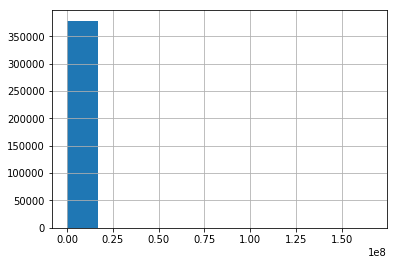

In [0]:
%matplotlib inline
kickstarter_2018.usd_goal_real.hist();

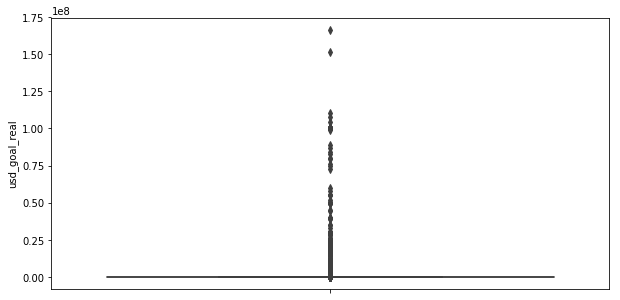

In [0]:
g = sns.boxplot(y='usd_goal_real',data=kickstarter_2018)
g.figure.set_size_inches((10,5))

Considerando la definicion de outlier dada en clase calculamos a continuación

In [0]:
outliers = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]
outliers

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hash_name,name_raro
1795,1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.00,2014-06-21 22:34:21,285.00,failed,5,CA,263.41,264.67,3575408.62,678b49f4df949a12dfbe6e230f2f8e71,0
2993,1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.00,2015-07-07 21:14:52,0.00,failed,0,IT,0.00,0.00,5568982.99,411f3239ffbefd44ebd08ac9eaec6489,0
3140,1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.00,2016-02-27 13:08:01,15.00,failed,6,ES,16.59,17.10,17104542.97,60e3c51dc0877373a1a03b9089152d75,-1
5076,1025947904,Long island city new york art book (Canceled),Photography,Photography,USD,2013-11-07,10000000.00,2013-10-08 23:16:26,0.00,canceled,0,US,0.00,0.00,10000000.00,a4de48b95764aad60a73c9410003ef2f,0
5759,1029500715,Harambe World's Tallest Statue,Public Art,Art,USD,2016-11-25,20000000.00,2016-09-26 18:08:01,1.00,canceled,1,US,0.00,1.00,20000000.00,e4e49c44720a7a99b7115a18bbaaff52,0
6161,1031487313,Music app ( Pupilize) is the next big thing fo...,Music,Music,USD,2017-02-07,5000000.00,2017-01-08 06:49:52,0.00,failed,0,US,0.00,0.00,5000000.00,146518cf1651b2613a8348966d7fa80b,0
9157,1046235166,Duel,Science Fiction,Film & Video,USD,2016-03-06,10000000.00,2016-01-06 15:00:11,100.00,failed,2,US,100.00,100.00,10000000.00,0679ba9276b2173b33d169d0502857ba,0
10449,1052555922,Cloud Based Project Analytics Dashboards,Software,Technology,USD,2017-03-05,10000000.00,2017-03-04 01:25:03,25.00,failed,1,US,25.00,25.00,10000000.00,4967610ead30faf7a939b53128d17797,0
12517,1062809925,Turn a Blind Eye,Narrative Film,Film & Video,GBP,2014-02-21,4000000.00,2013-12-23 22:36:10,0.00,failed,0,GB,0.00,0.00,6671447.87,78238b525991557c9a248f61dcbbe600,0
13803,106947703,Help FYFC Podcasts Buy a Harrier,Documentary,Film & Video,CAD,2014-10-21,4000000.00,2014-08-22 05:07:15,0.00,failed,0,CA,0.00,0.00,3568242.64,a7e80ba56b6a170e691e9365d4388b4b,0


Basándonos en alguna definición estadística donde
considera a un dato outlier cuando supera 1,5 veces el rango intercuartílico y en su defecto se denomina dato atípico cuando supera 3 veces el rango intercuartílico. Por lo tanto calcularemos outlier:


In [0]:
Q1 = kickstarter_2018.usd_goal_real.quantile(1/4)
Q3 = kickstarter_2018.usd_goal_real.quantile(3/4)
RIC=Q3 - Q1
l_inf = Q1 - 1.5 * RIC
l_sup = Q3 + 1.5 * RIC


In [0]:
outlier = (kickstarter_2018.usd_goal_real < l_inf) | (kickstarter_2018.usd_goal_real > l_sup)
outlier
print('Los outliers para la varieble usd_goal_real son ', outlier.sum())

Los outliers para la varieble usd_goal_real son  45508


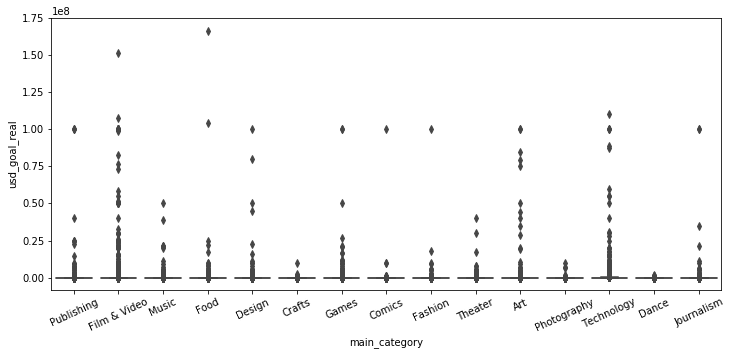

In [0]:


f, axes = plt.subplots(1, 1, figsize=(12, 5))

g = sns.boxplot(x= 'main_category', y= 'usd_goal_real', data = kickstarter_2018)
g = plt.xticks(rotation=25)

Ahora realizaremos un gráfico de boxplot pero sin los outliers


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

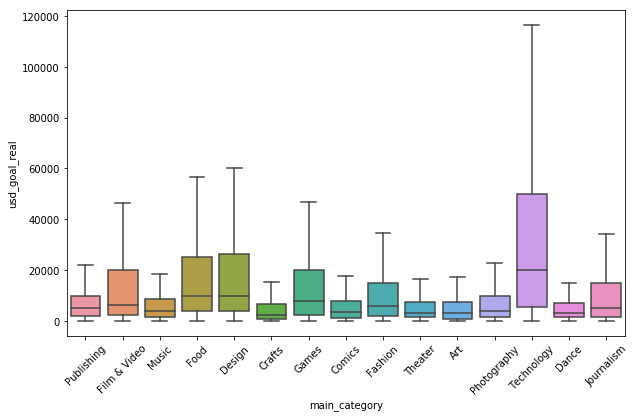

In [0]:
plt.figure(figsize=(10,6))
sns.boxplot(x="main_category", y="usd_goal_real", data=kickstarter_2018.drop(outliers.index), showfliers=False)
plt.xticks(rotation=45)